You can access our google colab implementation here: https://colab.research.google.com/drive/1QUL0TbG5fSmtGCTu9a4MQsvftYbwSV2q?usp=sharing

**You have to use .iit.edu email id.**

In [ ]:
import os
import cv2
import pickle
import numpy as np
import xml.etree.ElementTree as ETree
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

We have shared the google drive with you. You need to use an .iit.edu mail address to access the data. Here is the link to the data: https://drive.google.com/drive/folders/1MI7GsPA2SU5dZma2IRaxVQXj2KUIf3Yv?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_dir = '/content/drive/MyDrive/Face Mask Detection/images/'
annot_dir = '/content/drive/MyDrive/Face Mask Detection/annotations/'

In this code block, the faces in each of the images are marked and labelled using annotation. This will take about 6-10 minutes to complete. We have saved this data in 'data.npy' in the data folder.

In [ ]:
label_cat = {'without_mask': 0, 'with_mask': 1, 'mask_weared_incorrect': 2}
cat_label = {0 : 'without_mask', 1 : 'with_mask', 2 : 'mask_weared_incorrect'}
req_data = []

for root, dirs, files in os.walk(annot_dir):
    for file in files:
        tree = ETree.parse(os.path.join(root, file))
        data = {'path': None, 'objects': []}
        data['path'] = os.path.join(image_dir, tree.find('filename').text)
        for obj in tree.findall('object'):
            label = label_cat[obj.find('name').text]

            # top left co-ordinates
            xmin = int(obj.find('bndbox/xmin').text)
            ymin = int(obj.find('bndbox/ymin').text)

            # bottom right co-ordinates
            xmax = int(obj.find('bndbox/xmax').text)
            ymax = int(obj.find('bndbox/ymax').text)

            data['objects'].append([label, xmin, ymin, xmax, ymax])
        req_data.append(data)

print('Total images :', len(req_data))

Total images : 853


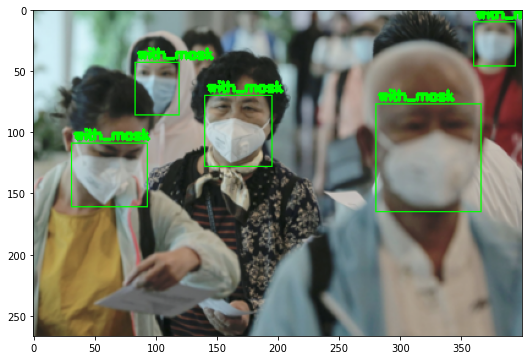

In [ ]:
index = np.random.randint(0, len(req_data))
img = cv2.imread(req_data[index]['path'])
for (category, xmin, ymin, xmax, ymax) in req_data[index]['objects']:
    # Draw bounding boxes
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 1)
    cv2.putText(img, str(cat_label[category]), (xmin+2, ymin-3), cv2.FONT_HERSHEY_SIMPLEX, 0.38, (0,255,0), 2)
# Show image
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
img_size = (100, 100)
data = []
target = []

for faces in req_data:
    img = cv2.imread(faces['path'])
    for (category, xmin, ymin, xmax, ymax) in faces['objects']:
        face = img[ymin : ymax, xmin : xmax]
        face = cv2.resize(face, (100, 100))
        d = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        t = to_categorical(category, num_classes=len(cat_label))
        data.append(d)
        target.append(t)

In [ ]:
np.save('data', np.array(data))
np.save('target', np.array(target))